Understanding PCA and reconstruction of image using concept eigenface
source code for understanding concept:https://programming.vip/docs/image-dimension-reduction-and-image-reconstruction-based-on-pca.html
Name:Priya

In [61]:
import numpy as np
import cv2 
from google.colab.patches import cv2_imshow

In [62]:

#Minimize the loss caused by dimensionality reduction and determine k
def Percentages(eigVals, percentage):
	sortArray = np.sort(eigVals)  # Ascending order
	sortArray = sortArray[-1::-1]  # Reversal, i.e. descending order
	arraySum = sum(sortArray)
	tmpSum = 0
	num = 0
	for i in sortArray:
		tmpSum += i
		num += 1
		if tmpSum >= arraySum * percentage:
			return num
def Z_centered(datamat):
	row,col=datamat.shape
	meanVal=np.mean(datamat,axis=0)
	meanVal = np.tile(meanVal,(row,1))
	newdata = datamat-meanVal
	return newdata, meanVal


#Get the largest k eigenvalues and eigenvectors
def EigDV(covmat, p):
	lem, V = np.linalg.eig(covmat) # Get eigenvalues and eigenvectors
	k = Percentages(lem, p) # Determine k value
	print("Retain 99%Information, the number of features after dimensionality reduction:"+str(k)+"\n")
	eigenvalue = np.argsort(lem)
	K_eigenValue = eigenvalue[-1:-(k+1):-1]
	K_eigenVector = V[:,K_eigenValue]
	return K_eigenValue, K_eigenVector
	
#Data after dimensionality reduction
def getlowDataMat(Datamat, K_eigenVector):
	return Datamat * K_eigenVector

#Refactoring data
def Reconstruction(lowDataMat, K_eigenVector, meanVal):
	reconDataMat = lowDataMat * K_eigenVector.T + meanVal
	return reconDataMat

#PCA algorithm
def PCA(data, p):
	datamat = np.float32(np.mat(data))
	#Data Centralization
	datamat, meanVal = Z_centered(datamat)
	#Computation of covariance matrix
		#covMat = Cov(dataMat)
	covmat = np.cov(datamat, rowvar=0)
	#Get the largest k eigenvalues and eigenvectors
	lem, V = EigDV(covmat, p)
	#Data after dimensionality reduction
	lowDataMat = getlowDataMat(datamat, V)
	#Refactoring data
	reconDataMat = Reconstruction(lowDataMat, V, meanVal)
	return reconDataMat


no. of features before dimension reductionality 640

Retain 99%Information, the number of features after dimensionality reduction:152

[[ 6  5  5 ...  5  4  3]
 [11 11 12 ... 10  9  8]
 [ 7  6  6 ...  6  8  8]
 ...
 [ 9 10 10 ... 10 10 11]
 [ 5  4  6 ...  4  6  7]
 [11  9 11 ...  9  8  8]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


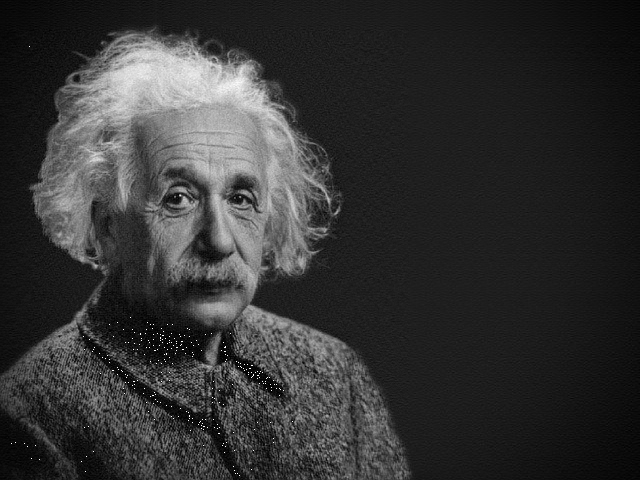

In [65]:

path = "/content/drive/My Drive/Colab Notebooks/albert-einstein-1933340_640.jpg"
img = cv2.imread("/content/drive/My Drive/Colab Notebooks/albert-einstein-1933340_640.jpg")
#print(type(img))
#print(img.shape)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
row,col=img.shape
#print(row,col)
#print(img)
print("no. of features before dimension reductionality "+str(col)+"\n")
recoImage=PCA(img,0.99)
recoImage=recoImage.astype(np.uint8)
print(recoImage)
cv2_imshow(recoImage)  #for google colab
cv2.waitKey(0)
cv2.destroyAllWindows()